Import Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

Import Data

In [31]:
data_raw = pd.read_csv("test.csv")
data_raw

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [32]:
col = "age"
data_raw = data_raw.drop(col,axis=1)

In [33]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   height  119404 non-null  float64
 2   size    119734 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


In [34]:
data_raw.describe()

,weight,height
count,119734.000000,119404.000000
mean,61.756811,165.805794
std,9.944863,6.737651
min,22.000000,137.160000
25%,55.000000,160.020000
50%,61.000000,165.100000
75%,67.000000,170.180000
max,136.000000,193.040000


In [35]:
data_raw['size'].value_counts()

M      29712
S      21924
XXL    21359
XL     19188
L      17587
XS      9964
Name: size, dtype: int64

[Text(0, 0, '19188'),
 Text(0, 0, '17587'),
 Text(0, 0, '29712'),
 Text(0, 0, '21924'),
 Text(0, 0, '9964'),
 Text(0, 0, '21359')]

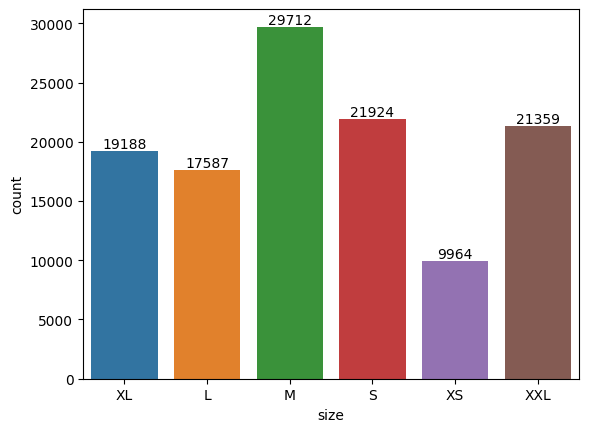

In [36]:
ax = sns.countplot(x=data_raw['size'])
ax.bar_label(ax.containers[0])

In [37]:
data_raw.isnull().sum()

weight      0
height    330
size        0
dtype: int64

In [38]:
data_raw = data_raw.dropna()

In [39]:
# data_raw['age'] = data_raw['age'].fillna(data_raw['age'].mean())
# data_raw['height'] = data_raw['height'].fillna(data_raw['height'].mean())

In [40]:
data_raw.isnull().sum()

weight    0
height    0
size      0
dtype: int64

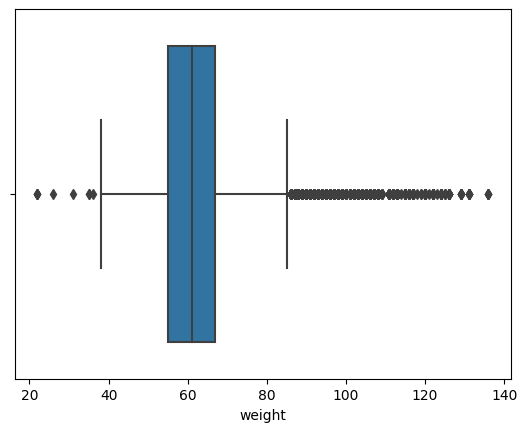

In [41]:
sns.boxplot(x=data_raw['weight'])
plt.show()

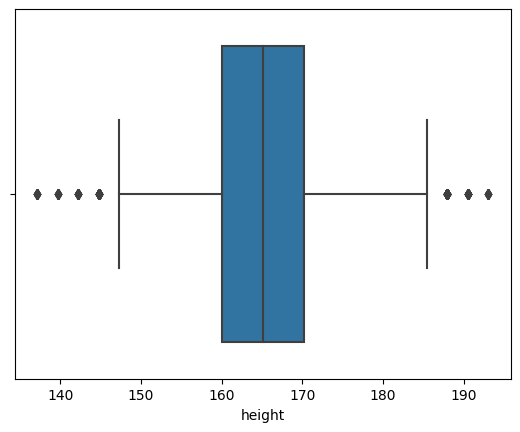

In [42]:
sns.boxplot(x=data_raw['height'])
plt.show()

In [43]:
def outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    lists = df.index[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    return lists

In [44]:
index_lists = []
for feature in ['weight', 'height']:
    index_lists.extend(outliers(data_raw, feature))

In [45]:
index_lists

[33,
 73,
 74,
 77,
 91,
 98,
 121,
 130,
 196,
 203,
 233,
 304,
 418,
 451,
 558,
 572,
 598,
 612,
 628,
 657,
 696,
 732,
 820,
 825,
 843,
 868,
 871,
 900,
 905,
 961,
 1001,
 1010,
 1022,
 1036,
 1052,
 1066,
 1100,
 1165,
 1168,
 1229,
 1239,
 1328,
 1357,
 1439,
 1506,
 1530,
 1574,
 1674,
 1690,
 1735,
 1802,
 1882,
 1898,
 1903,
 2039,
 2078,
 2120,
 2126,
 2144,
 2222,
 2358,
 2365,
 2400,
 2420,
 2439,
 2465,
 2478,
 2500,
 2531,
 2618,
 2681,
 2697,
 2714,
 2769,
 2812,
 2866,
 2995,
 3049,
 3076,
 3118,
 3136,
 3137,
 3142,
 3172,
 3249,
 3250,
 3302,
 3318,
 3329,
 3330,
 3348,
 3385,
 3454,
 3465,
 3470,
 3561,
 3580,
 3608,
 3632,
 3682,
 3696,
 3721,
 3726,
 3741,
 3775,
 3812,
 3850,
 3922,
 3970,
 3991,
 4087,
 4105,
 4120,
 4156,
 4173,
 4211,
 4234,
 4240,
 4245,
 4251,
 4308,
 4387,
 4397,
 4407,
 4460,
 4461,
 4516,
 4523,
 4561,
 4622,
 4635,
 4641,
 4679,
 4695,
 4696,
 4719,
 4756,
 4763,
 4796,
 4814,
 4866,
 4881,
 4909,
 4918,
 4925,
 5006,
 5081,
 5101,


In [46]:
def remove(df, lists):
    lists = sorted(set(lists))
    df = df.drop(lists)
    return df

In [47]:
df_cleaned = remove(data_raw, index_lists)
df_cleaned.shape

(115745, 3)

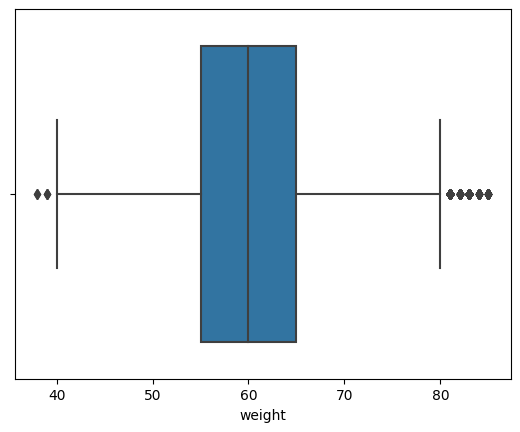

In [48]:
sns.boxplot(x=df_cleaned['weight'])
plt.show()

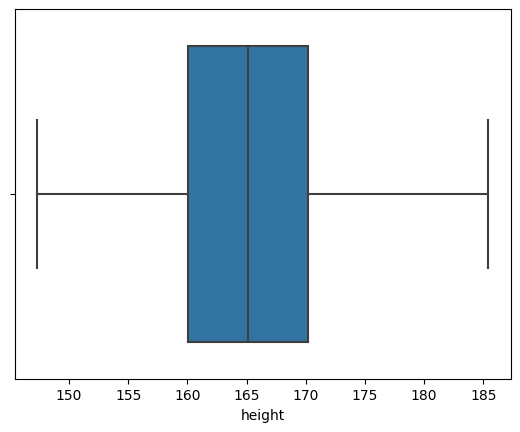

In [49]:
sns.boxplot(x=df_cleaned['height'])
plt.show()

In [50]:
# df_cleaned = df_cleaned.to_numpy()
data_raw = data_raw.to_numpy()

In [51]:
# df_cleaned
data_raw

array([[62, 172.72, 'XL'],
       [59, 167.64, 'L'],
       [61, 165.1, 'M'],
       ...,
       [61, 172.72, 'M'],
       [74, 167.64, 'XL'],
       [70, 167.64, 'XL']], dtype=object)

In [52]:
size = ["XS","S","M","L","XL","XXL"]

In [53]:
X = []
y = []
for i in data_raw:
    X.append(i[0:2])
    y.append(size.index(i[2]))

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [60]:
model = DecisionTreeClassifier()
history = model.fit(X_train, y_train)
y_pred = model.predict(X)

In [63]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [65]:
accuracy_score(y, y_pred)

0.5091621721215369

In [57]:
test = size[model.predict([[60,170]])[0]]
test

'M'

In [58]:
pickle.dump(model, open('model.pkl', 'wb'))

In [64]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)

Training Accuracy: 0.5103058727189823
Testing Accuracy: 0.4988694414203166


In [71]:
accuracy_df = pd.DataFrame({'Set': ['Train', 'Test'],
                            'Accuracy': [accuracy_train, accuracy_test]})


accuracy_df

,Set,Accuracy
0,Train,0.510306
1,Test,0.498869
